# Loading the data from github

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
url = "https://raw.githubusercontent.com/Kolo-Naukowe-Data-Science-PW/Rekrutacja_2023/main/spaceship_titanic/poprawne_dane.csv"

data_raw = pd.read_csv(url)

In [3]:
data_raw.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
8,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True
9,0008_03,Europa,False,B/1/P,55 Cancri e,45.0,False,39.0,7295.0,589.0,110.0,124.0,Wezena Flatic,True


PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.

CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

Destination - The planet the passenger will be debarking to.

Age - The age of the passenger.

VIP - Whether the passenger has paid for special VIP service during the voyage.

RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

Name - The first and last names of the passenger.

Transported - Whether the passenger was transported to another dimension. This is the target, the column you want to predict if you decide to create a machine learning model (see task description).

In [4]:
len(data_raw)

6466

In [5]:
data_raw.isnull().values.any()

np.False_

In [6]:
def text_split(input,at):
    parts = input.split('/')
    return parts[at]

data_raw["Deck"]=data_raw["Cabin"].map(lambda x:text_split(x,0)).values

data_raw["Num"] = data_raw["Cabin"].map(lambda x: text_split(x,1)).values

data_raw["Side"] = data_raw["Cabin"].map(lambda x: text_split(x,2)).values

# Exploring Categorical Columns

### First glimpse at the cateogrical data

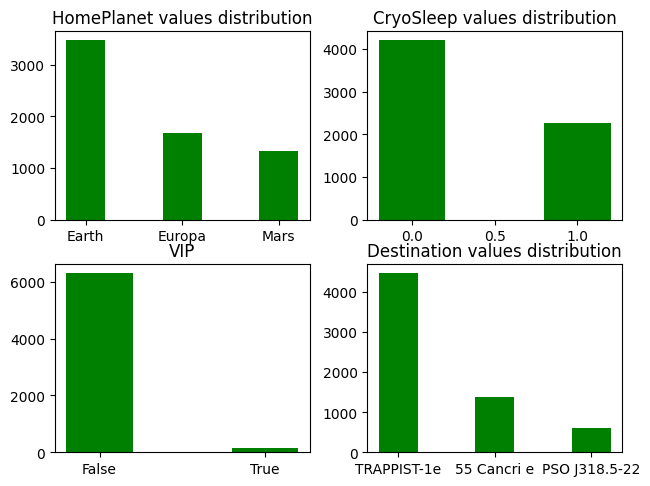

In [7]:
fig, axs = plt.subplots(2,2)
fig.tight_layout()


home_planet= data_raw["HomePlanet"].value_counts()
cryosleep = data_raw["CryoSleep"].value_counts()
destination = data_raw["Destination"].value_counts()
vip = data_raw["VIP"].value_counts()

axs[0,0].set_title("HomePlanet values distribution")
axs[0,0].bar(home_planet.index,home_planet.values,width=0.4,color='g')

axs[0,1].set_title("CryoSleep values distribution")
axs[0,1].bar(cryosleep.index,cryosleep.values,width=0.4,color='g')

axs[1,1].set_title("Destination values distribution")
axs[1,1].bar(destination.index,destination.values,width=0.4,color='g')

axs[1,0].set_title("VIP")
axs[1,0].bar(["False","True"],vip.values,width=0.4,color='g')
plt.show()


### Most choosen routes

[Text(0, 0.5, 'Earth'), Text(0, 1.5, 'Europa'), Text(0, 2.5, 'Mars')]

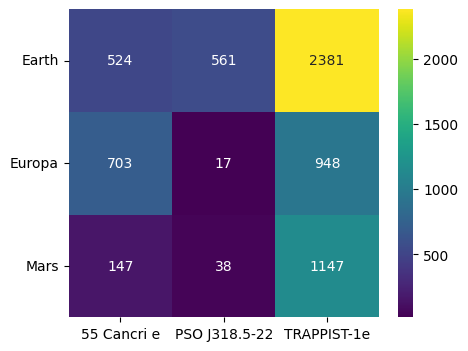

In [8]:
data_counts = data_raw.groupby(["HomePlanet","Destination"]).size().unstack(fill_value=0)


planets = data_counts.columns
destinations = data_counts.index
tablica = data_counts.values

fig,ax = plt.subplots(figsize=(5,4))

sns.heatmap(tablica,annot=True,cmap="viridis",fmt="d",xticklabels=planets,yticklabels=destinations,ax=ax)


ax.set_yticklabels(rotation=0,labels=destinations)


### Average expenses for vip and non-vip passengers on each atraction

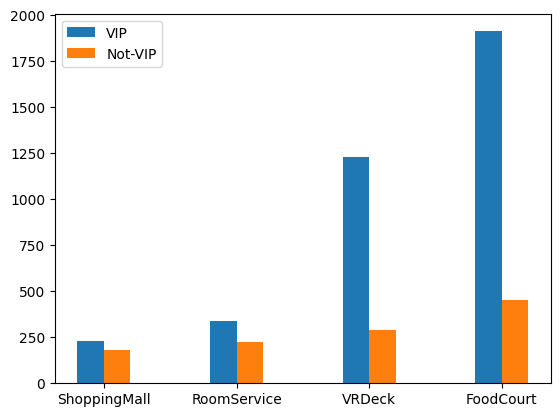

In [9]:
data_raw["Sum"]= data_raw[["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]].sum(axis=1)
data_raw

x = data_raw.groupby(["VIP"])[["RoomService","VRDeck","ShoppingMall","FoodCourt"]].mean()

vip_true = x.loc[True].sort_values().to_dict()

vip_false = x.loc[False].sort_values().to_dict()

x_ind = np.arange(len(vip_false.keys()))

plt.bar(x_ind-0.1,vip_true.values(),label="VIP",width=0.2)
plt.bar(x_ind+0.1,vip_false.values(),label="Not-VIP",width=0.2)
plt.xticks(np.arange(4),vip_false.keys())
plt.legend()
plt.show()

# fig,ax = plt.subplots(figsize=(5,4))

# sns.heatmap(x.values,annot=True,xticklabels=x.columns,yticklabels=["Non-VIP","VIP"],fmt="g")

# VIP's choosen destination

<Axes: >

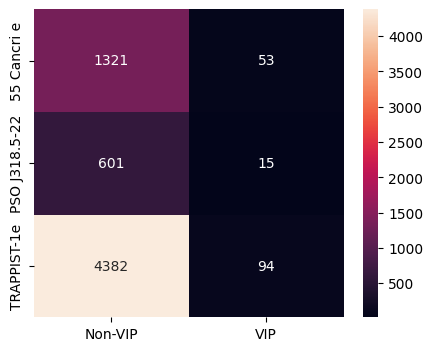

In [10]:
x = data_raw.groupby(["VIP"])["Destination"].value_counts().unstack()
fig,ax = plt.subplots(figsize=(5,4))
sns.heatmap(x.values.T,xticklabels=["Non-VIP","VIP"],yticklabels=x.columns,fmt="d",annot=True)

# VIP's HomePlanet

<Axes: >

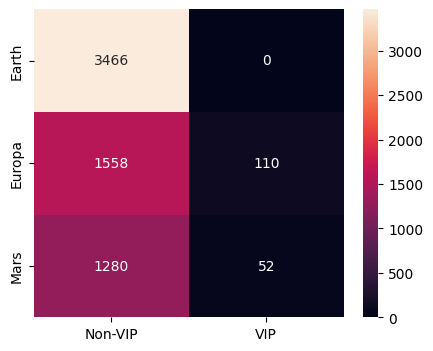

In [11]:
x = data_raw.groupby(["VIP"])["HomePlanet"].value_counts().unstack()
x =x.fillna(0)

fig,ax = plt.subplots(figsize=(5,4))

sns.heatmap(x.values.T,xticklabels=["Non-VIP","VIP"],yticklabels=x.columns,annot=True,fmt="g")

#### Expenses and Age

C:\Users\bzabk\AppData\Local\Temp\ipykernel_3324\2721302936.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  x = data_raw.groupby(["Age_group"])["Sum"].sum()
C:\Users\bzabk\AppData\Local\Temp\ipykernel_3324\2721302936.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(rotation=45,labels=x["Age_group"])


Text(0.5, 1.0, 'Percentage share of each age group in total expenditure')

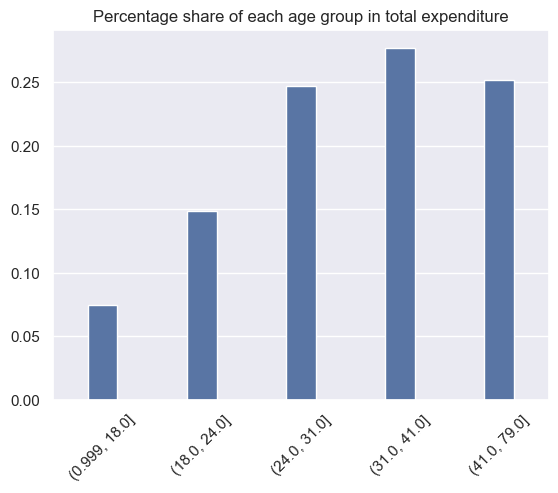

In [12]:
income = data_raw["Sum"].sum()

data_raw["Age_group"] = pd.qcut(data_raw["Age"],q=5)
x = data_raw.groupby(["Age_group"])["Sum"].sum()
x = x/income
x = x.reset_index()
sns.set_theme(style="darkgrid")
ax = sns.barplot(x,x="Age_group",y="Sum",width=0.3)

ax.set_xlabel('')
ax.set_ylabel('')



ax.set_xticklabels(rotation=45,labels=x["Age_group"])

ax.set_title('Percentage share of each age group in total expenditure')

C:\Users\bzabk\AppData\Local\Temp\ipykernel_3324\2347167156.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  x = data_raw.groupby(["Age_group"])[["Sum","FoodCourt","RoomService","ShoppingMall","Spa","VRDeck"]].mean()


Text(0, 0.5, '')

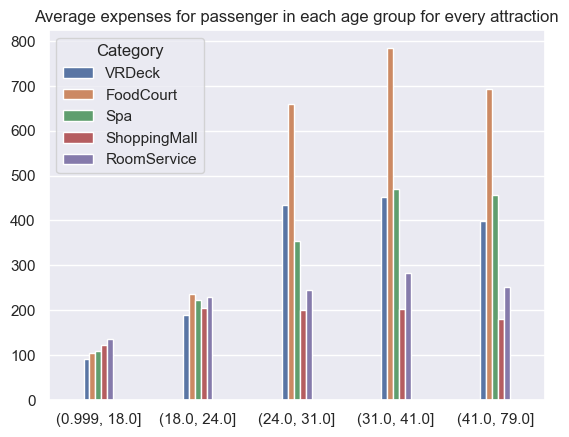

In [13]:

x = data_raw.groupby(["Age_group"])[["Sum","FoodCourt","RoomService","ShoppingMall","Spa","VRDeck"]].mean()
x = x.reset_index()
x=pd.melt(x,id_vars='Age_group', value_vars=["FoodCourt","RoomService","ShoppingMall","Spa","VRDeck"],
                   var_name='Category', value_name='Value')

x=x.sort_values(by=["Age_group","Value"],ascending=[True,True])
z = sns.barplot(data=x,x="Age_group",y="Value",width=0.3,hue='Category',dodge=True)
z.set_title("Average expenses for passenger in each age group for every attraction")
z.set_xlabel('')
z.set_ylabel('')

#### Deck with expenses summary

[Text(0, 0.5, 'A'),
 Text(0, 1.5, 'B'),
 Text(0, 2.5, 'C'),
 Text(0, 3.5, 'D'),
 Text(0, 4.5, 'E'),
 Text(0, 5.5, 'F'),
 Text(0, 6.5, 'G'),
 Text(0, 7.5, 'T')]

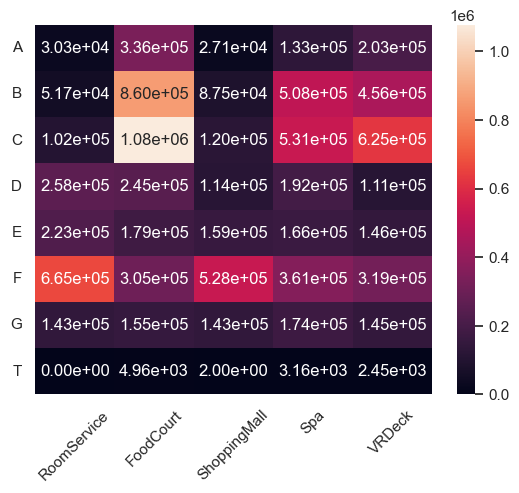

In [14]:
def get_second(input):
    sep = input.split(" ")
    return sep[1]

data_raw["Second_Name"] = data_raw["Name"].apply(get_second)
x = data_raw.groupby(["Second_Name","Deck"])
x = data_raw.groupby(["Deck"])[["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]].sum()

map = sns.heatmap(x.values,xticklabels=x.columns,yticklabels=x.index,fmt=".2e",annot=True)
map.set_xticklabels(rotation=45,labels=x.columns)
map.set_yticklabels(rotation=0,labels=x.index)

#### More people who were transported were seated at the Starboard site, and conversly More people who were transported were seated at the Port site,

[]

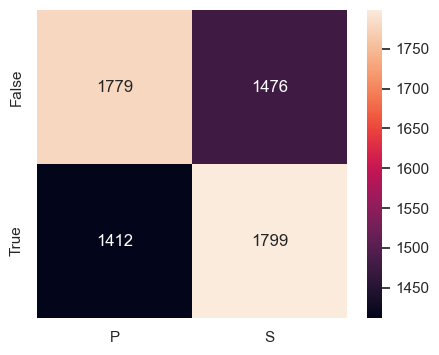

In [15]:
df = data_raw
df_home_cry = df.groupby(["Transported","Side"]).size().unstack(fill_value=0)

df_home_cry.columns
df_home_cry.index
fig,ax = plt.subplots(figsize=(5,4))
sns.heatmap(df_home_cry.values,annot=True,fmt="d",ax=ax,xticklabels=df_home_cry.columns,yticklabels=df_home_cry.index)
plt.plot()

Transported  False  True 
VIP                      
False         3153   3151
True           102     60


<Axes: >

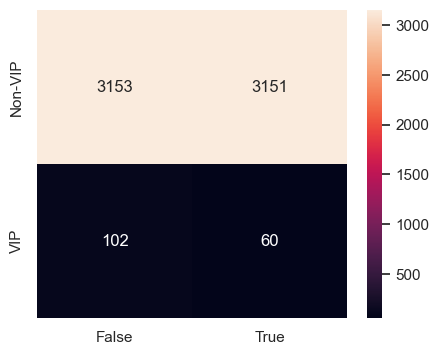

In [16]:
x  = data_raw.groupby(["VIP"])["Transported"].value_counts().unstack()
fig,ax = plt.subplots(figsize=(5,4))
print(x)

sns.heatmap(x.values,xticklabels=x.columns,yticklabels=["Non-VIP","VIP"],annot=True,fmt="g")

#### Comparing Age distribution among VIP and None-VIP passengers

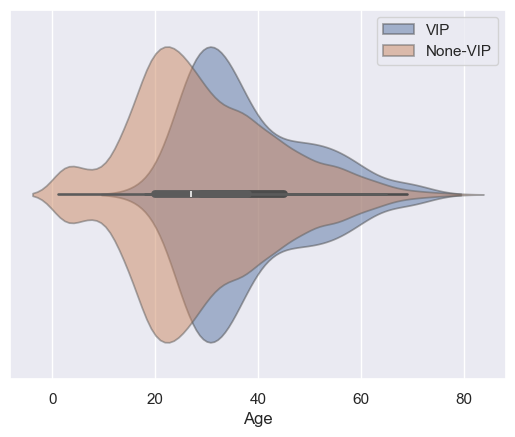

In [17]:
vip_data = data_raw[data_raw["VIP"]==True]
non_vip_data = data_raw[data_raw["VIP"]==False]
x = vip_data["Age"].mean()
sns.violinplot(vip_data["Age"],alpha=0.5,orient='h',label="VIP")
sns.violinplot(non_vip_data["Age"],alpha=0.5,orient='h',label="None-VIP")
plt.legend()

#### Percentage share of each age group among total passengers on each deck

In [18]:
temp = data_raw.groupby('Deck')['Age_group'].value_counts().unstack().reset_index()
temp.columns = temp.columns.map(str)

temp["Sum"]=temp.iloc[:,1:].sum(axis=1)
temp = temp.drop([7])
for col in temp.columns[1:]:
     temp[col] = temp[col]/temp['Sum']
data_temp =temp.iloc[:,1:].cumsum(axis=1)
data_temp.columns = data_temp.columns.map(str)
data_temp = data_temp.drop(columns="Sum")

def find_level(df: pd.DataFrame):
    x = pd.DataFrame(index =df.index)

    for i,column in enumerate(df.columns):
        

        if i ==0:
            x[column]=df[column]/2
        
        else:

            x[column] = df.iloc[:,i-1]+(df.iloc[:,i]-df.iloc[:,i-1])/2
    

    return x
x = find_level(data_temp)

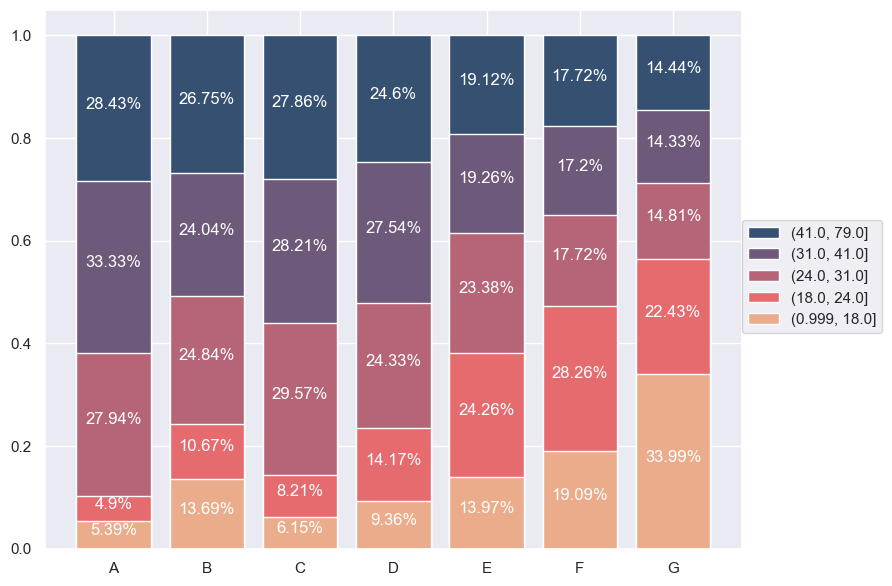

In [22]:
fig, ax = plt.subplots(figsize=(9, 7))

colors = ['#355070','#6d597a','#b56576','#e56b6f','#eaac8b']

x_cords = np.arange(len(data_temp))

for i,col in enumerate(reversed(data_temp.columns[:])):

    ax.bar(x_cords,data_temp[col],label=col,color=colors[i])

    for j,value in enumerate(temp[col]):
        
        ax.text(j,x.loc[j,col],s=f"{str(round(value*100,2))}%",ha='center',color="white")
    
ax.set_xticks([0,1,2,3,4,5,6])
ax.set_xticklabels(temp["Deck"])

plt.legend(loc=(1,0.4))





In [148]:
import matplotlib.pyplot as plt
data_young = data_raw.query("Age<=18")

print(data_young["FoodCourt"].mean())
print(data_raw['FoodCourt'].mean())

104.82835249042145
489.3287967831735


In [222]:
data_raw.query('Age<=12')["Sum"].sum()

np.float64(0.0)

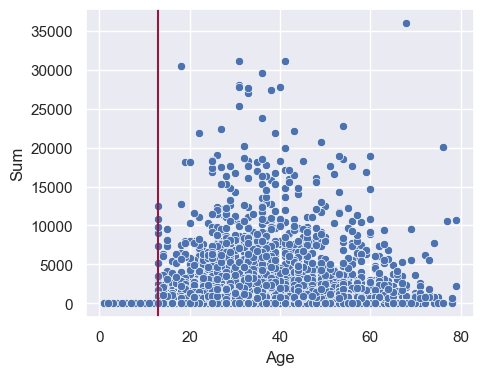

In [219]:
fig,ax = plt.subplots(figsize=(5,4))
sns.scatterplot(data_raw,y="Sum",x="Age",ax=ax)

ax.axline((13,0),(13,35000),color="#921A40")

In [203]:
#Corr between agegroup and trasnported

tab = pd.crosstab(index=data_raw["Sum"],columns=data_raw["Transported"])
tab

Transported,False,True
Sum,,
0.0,559,2037
336.0,1,0
394.0,2,0
395.0,0,1
397.0,1,0
...,...,...
29608.0,1,0
30478.0,1,0
31074.0,0,1


In [204]:
from scipy.stats import chi2_contingency

chi2_contingency(tab)

Chi2ContingencyResult(statistic=np.float64(3237.2825488340604), pvalue=np.float64(2.8898102459867034e-71), dof=1915, expected_freq=array([[1.30683266e+03, 1.28916734e+03],
       [5.03402413e-01, 4.96597587e-01],
       [1.00680483e+00, 9.93195175e-01],
       ...,
       [5.03402413e-01, 4.96597587e-01],
       [5.03402413e-01, 4.96597587e-01],
       [5.03402413e-01, 4.96597587e-01]]))

In [205]:
from scipy.stats import pearsonr

pearsonr(data_raw["Transported"],data_raw["Sum"])

PearsonRResult(statistic=np.float64(-0.18615604233602356), pvalue=np.float64(1.6607329641871175e-51))